<a href="https://colab.research.google.com/github/samsyano/CNN-Food-Multiclassifier-/blob/main/Food_MultiClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multiclass Image Classification

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2023-06-10 10:58:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   126MB/s    in 3.5s    

2023-06-10 10:58:40 (142 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 

In [ ]:
# Setup the train and test directories

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Get the class names of the images

import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
# View Random Image

# Visualizing Images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class

  # Get random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  print(random_image[0])

  # Read in the image and plot
  img =mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image Shape: {img.shape}")

  return img

['2590819.jpg']
2590819.jpg
Image Shape: (512, 512, 3)


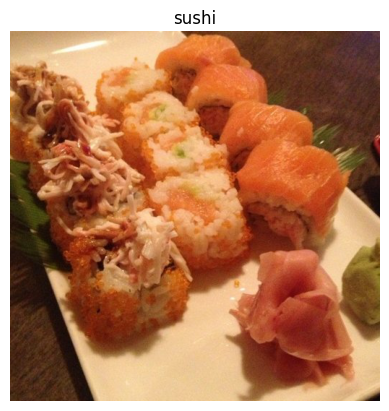

In [ ]:
# Visualize data

img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))


In [ ]:
random.choice(class_names)

'chicken_wings'

Preprocess the Data and prepare it for Model Training

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# proprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


# import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42
                                               )

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42
                                               )

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# New Section

Create a Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation


In [ ]:

# Build a CNN model

model_1 = tf.keras.models.Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# compile CNN
model_1.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(),
                metrics=["Accuracy"])

In [ ]:
# fit the model

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 66s 224ms/step - loss: 2.2269 - Accuracy: 0.1651 - val_loss: 2.1585 - val_Accuracy: 0.1988
Epoch 2/5
235/235 [==============================] - 57s 243ms/step - loss: 1.9782 - Accuracy: 0.3036 - val_loss: 1.9356 - val_Accuracy: 0.3020
Epoch 3/5
235/235 [==============================] - 54s 231ms/step - loss: 1.5531 - Accuracy: 0.4757 - val_loss: 1.9669 - val_Accuracy: 0.3140
Epoch 4/5
235/235 [==============================] - 53s 224ms/step - loss: 0.7977 - Accuracy: 0.7391 - val_loss: 2.6210 - val_Accuracy: 0.2696
Epoch 5/5
235/235 [==============================] - 60s 256ms/step - loss: 0.2463 - Accuracy: 0.9289 - val_loss: 4.0568 - val_Accuracy: 0.2776


In [ ]:
# Model Evaluation

# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Return separate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["Accuracy"]
  val_accuracy = history.history["val_Accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="Accuracy")
  plt.plot(epochs, val_accuracy, label="val_Accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

In [ ]:

# Evaluate on the test data
model_1.evaluate(test_data)

79/79 [==============================] - 12s 155ms/step - loss: 4.0568 - Accuracy: 0.2776


[4.056787490844727, 0.2775999903678894]

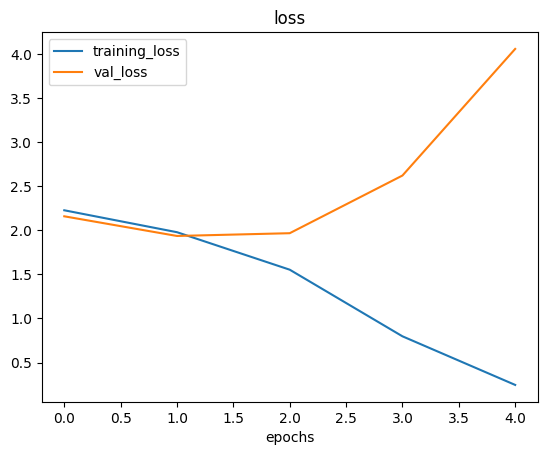

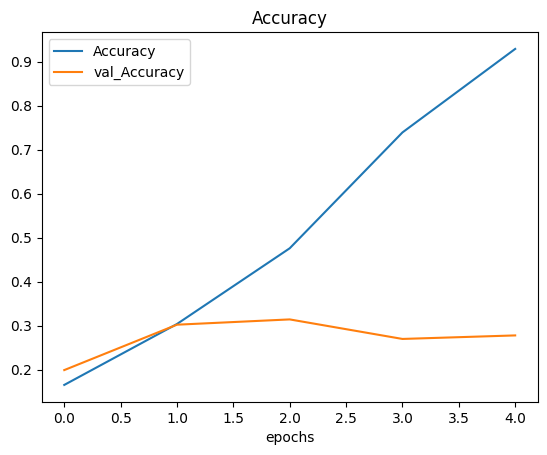

In [ ]:
# model lost curve

plot_loss_curves(history_1)

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

### Improve the model
* Data Augmentation

In [ ]:
# Data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# import data from directories and turn into batches
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42
                                               )


Found 7500 images belonging to 10 classes.


In [ ]:
# Created a model fitted on the augmented data
# Clone model_1

model_2 = tf.keras.models.clone_model(model_1)

# compile Model
model_2.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(),
                metrics=["Accuracy"])


In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
# Fit the model
history_2 = model_2.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 125s 518ms/step - loss: 2.2244 - Accuracy: 0.1716 - val_loss: 2.0597 - val_Accuracy: 0.2568
Epoch 2/5
235/235 [==============================] - 131s 559ms/step - loss: 2.1116 - Accuracy: 0.2280 - val_loss: 1.9949 - val_Accuracy: 0.2944
Epoch 3/5
235/235 [==============================] - 126s 532ms/step - loss: 2.0592 - Accuracy: 0.2727 - val_loss: 1.9005 - val_Accuracy: 0.3348
Epoch 4/5
235/235 [==============================] - 129s 551ms/step - loss: 1.9912 - Accuracy: 0.3025 - val_loss: 1.8803 - val_Accuracy: 0.3484
Epoch 5/5
235/235 [==============================] - 122s 519ms/step - loss: 1.9715 - Accuracy: 0.3139 - val_loss: 1.7934 - val_Accuracy: 0.3824


In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 12s 153ms/step - loss: 1.7934 - Accuracy: 0.3824


[1.7933796644210815, 0.3824000060558319]

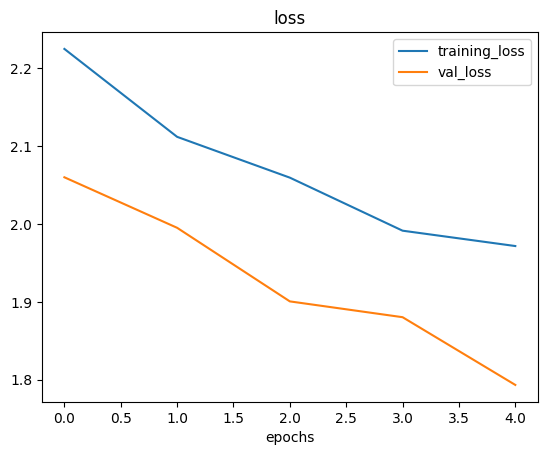

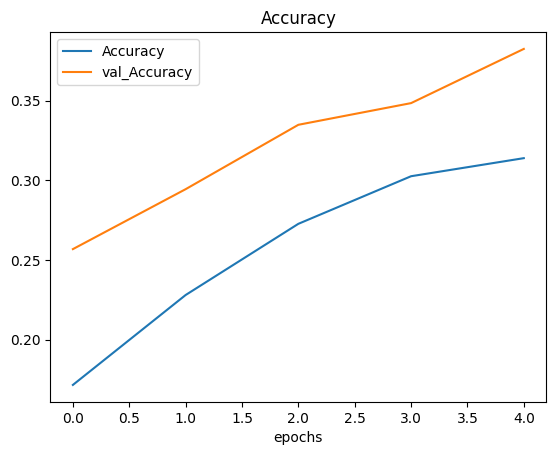

In [ ]:
plot_loss_curves(history_2)

### Make prediction with our model

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg



--2023-06-10 11:24:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.04s   

2023-06-10 11:24:38 (63.1 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)
  print("Success")

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)
  print("Initial shape: ", img.shape)
  print("Successful")

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img


In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  print(pred)
  print(len(pred[0]))

  # Add in logic for multiclass
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int[tf.round(pred[0])]]

  # # # Get the predicted class (for binary prediction)
  # pred_class = class_names[int(tf.round(pred)[0][0])]


  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
load_and_prep_image(filename="sushi.jpeg")
# pred_and_plot(model=model_2, filename="03-sushi.jpeg", class_names=class_names)

Success
Initial shape:  (1260, 900, 3)
Successful


<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.94240195, 0.94240195, 0.94240195],
        [0.94240195, 0.94240195, 0.94240195],
        [0.9502451 , 0.9502451 , 0.9502451 ],
        ...,
        [0.91764706, 0.91764706, 0.91764706],
        [0.91764706, 0.91764706, 0.91764706],
        [0.91764706, 0.91764706, 0.91764706]],

       [[0.9403514 , 0.9403514 , 0.9403514 ],
        [0.95512295, 0.95512295, 0.95512295],
        [0.9647059 , 0.9647059 , 0.9647059 ],
        ...,
        [0.91764706, 0.91764706, 0.91764706],
        [0.91764706, 0.91764706, 0.91764706],
        [0.91764706, 0.91764706, 0.91764706]],

       [[0.9392507 , 0.9392507 , 0.9392507 ],
        [0.95500696, 0.95500696, 0.95500696],
        [0.94781816, 0.94781816, 0.94781816],
        ...,
        [0.91764706, 0.91764706, 0.91764706],
        [0.91764706, 0.91764706, 0.91764706],
        [0.91764706, 0.91764706, 0.91764706]],

       ...,

       [[0.85490197, 0.80784315, 0.7607843 ],
        [0.85

In [ ]:
load_and_prep_image(filename="03-pizza-dad.jpeg")

Success
Initial shape:  (4032, 3024, 3)
Successful


<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.2887255 , 0.3009804 , 0.2632353 ],
        [0.44705883, 0.47843137, 0.39607844],
        [0.57598037, 0.5955882 , 0.5093137 ],
        ...,
        [0.05686275, 0.06862745, 0.04117647],
        [0.05588235, 0.0754902 , 0.04803922],
        [0.07745098, 0.08921569, 0.06176471]],

       [[0.9377451 , 0.9553922 , 0.9651961 ],
        [0.8838235 , 0.9102941 , 0.92107844],
        [0.9411765 , 0.9607843 , 0.9588235 ],
        ...,
        [0.04313726, 0.05490196, 0.02745098],
        [0.07843138, 0.09019608, 0.0627451 ],
        [0.08186275, 0.10147059, 0.07401961]],

       [[0.12745099, 0.13529412, 0.12352941],
        [0.175     , 0.17450981, 0.16617647],
        [0.12941177, 0.14901961, 0.13333334],
        ...,
        [0.03431373, 0.05196078, 0.0245098 ],
        [0.05833333, 0.07009804, 0.04264706],
        [0.05343137, 0.08088236, 0.0495098 ]],

       ...,

       [[0.24264705, 0.16029412, 0.07794118],
        [0.23

Success
Initial shape:  (4032, 3024, 3)
Successful
1/1 [==============================] - 0s 19ms/step
[[0.08591196 0.04102825 0.14364198 0.03469476 0.0512798  0.19608834
  0.09012038 0.11786057 0.04286235 0.19651158]]
10


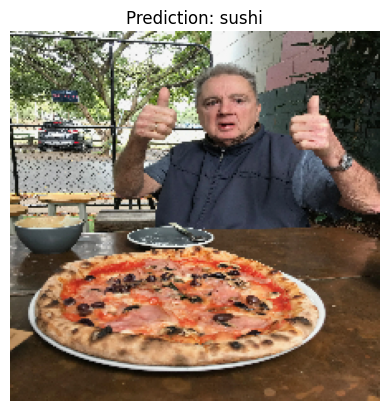

In [ ]:
pred_and_plot(model=model_2, filename="03-pizza-dad.jpeg", class_names=class_names)

Success
Initial shape:  (1260, 900, 3)
Successful
1/1 [==============================] - 0s 18ms/step
[[0.05321555 0.03474713 0.05986436 0.19467464 0.12325869 0.12877367
  0.0573825  0.08010544 0.1017852  0.16619287]]
10


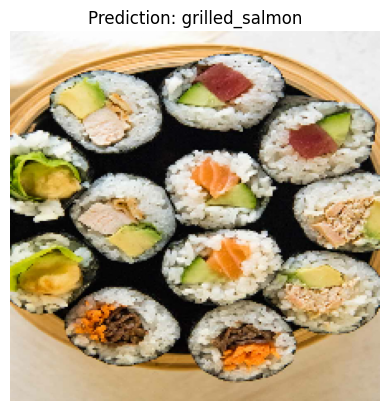

In [ ]:
pred_and_plot(model=model_2, filename="sushi.jpeg", class_names=class_names)

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

### Saving a Model

In [ ]:
# Save model
model_2.save("Model_2")

In [ ]:
# Load the saved model and evaluate

saved_model = tf.keras.models.load_model("Model_2")
saved_model.evaluate(test_data)

79/79 [==============================] - 13s 163ms/step - loss: 1.7934 - Accuracy: 0.3824


[1.7933799028396606, 0.3824000060558319]